In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [9]:
import warnings
warnings.filterwarnings("ignore")

df["Date"]=pd.to_datetime(df["Date"], errors="coerce",format='%d-%m-%Y')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [10]:
cols=df.columns

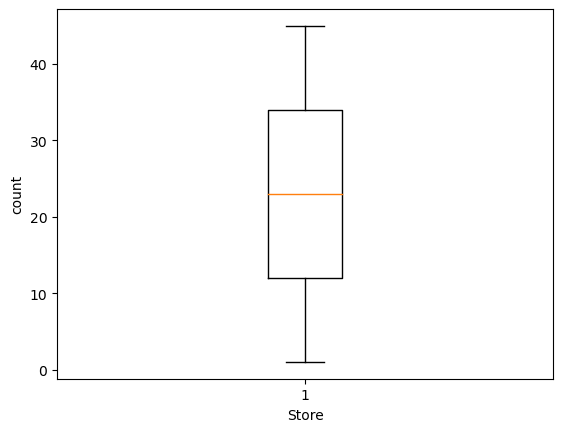

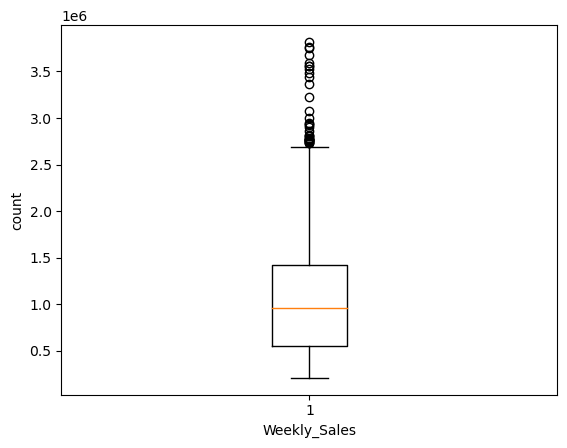

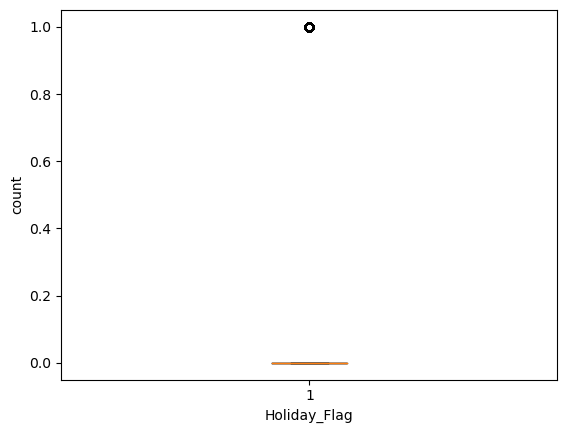

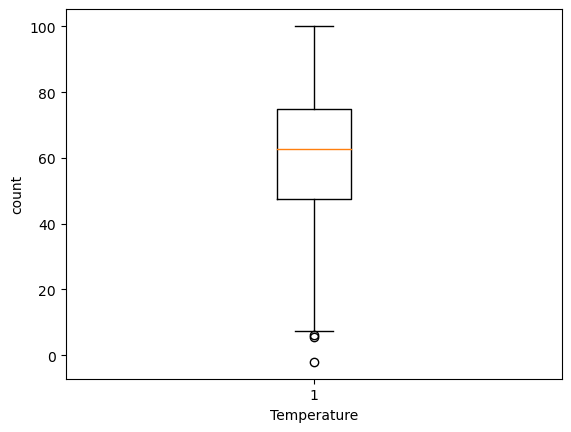

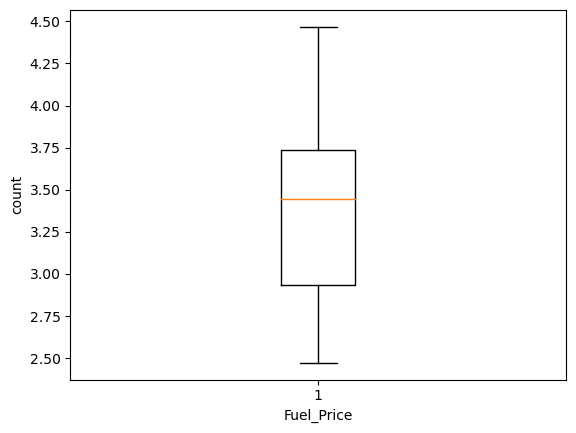

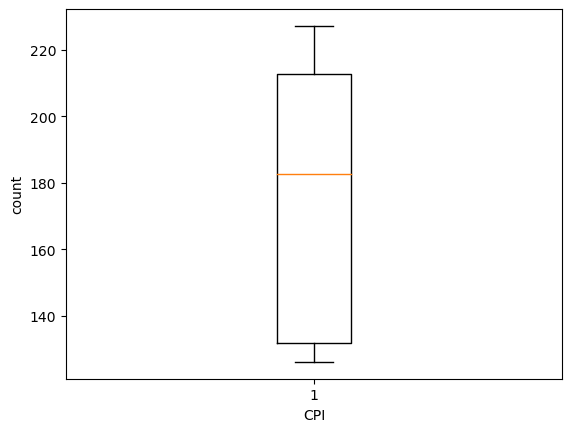

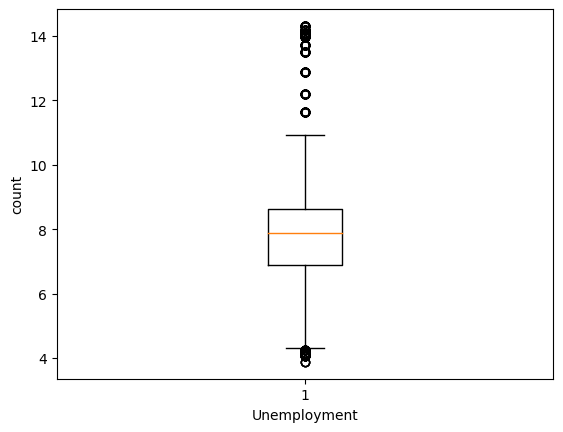

In [11]:
# Identification of Outliers 
for column in cols:
    if(df[column].dtypes=="int64" or df[column].dtypes=="float64"):
        plt.boxplot(df[column])
        plt.xlabel(column)
        plt.ylabel("count")
        plt.show()

In [12]:
# Dealing with outliers
outlier_columns=["Weekly_Sales", "Temperature", "Unemployment"]

In [13]:
for i in outlier_columns:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-1.5*IQR
    UL=Q3+1.5*IQR
    df=df[(df[i]<=UL)&(df[i]>=LL)]

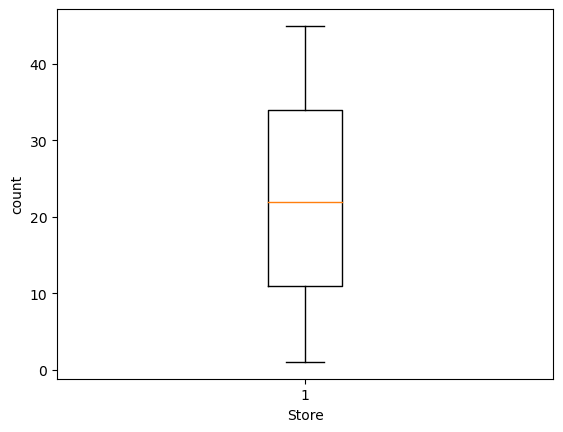

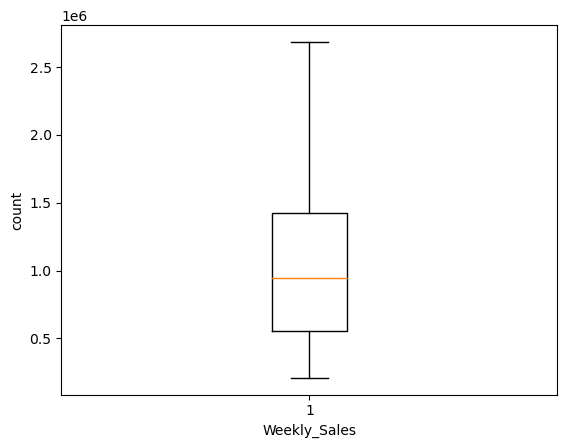

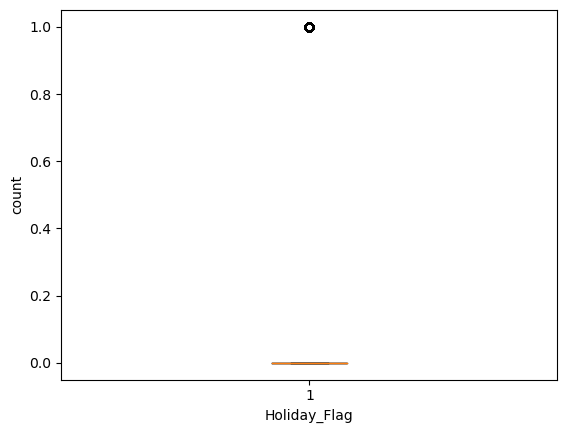

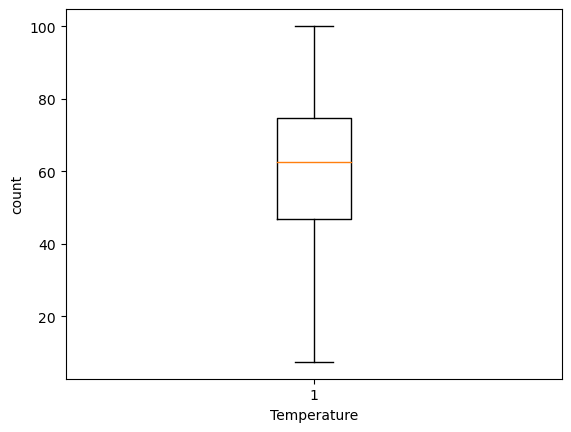

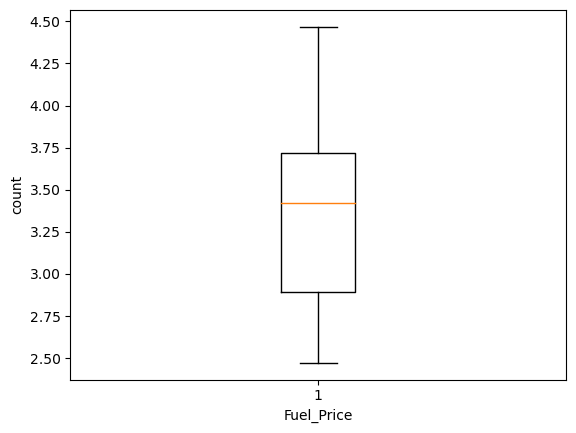

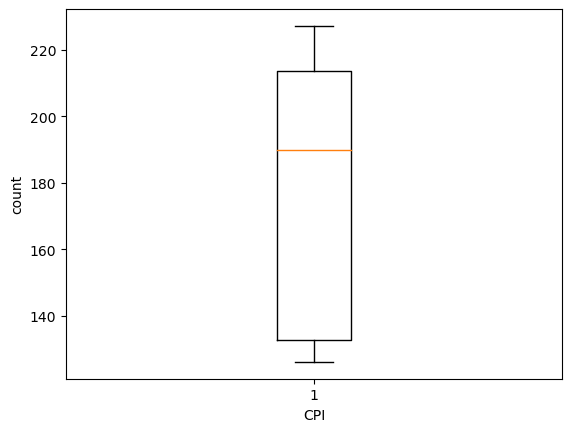

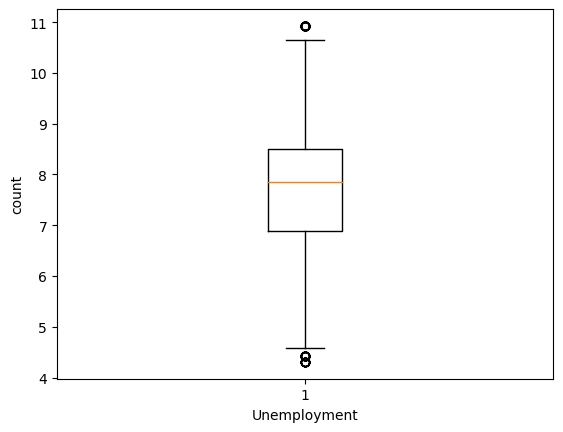

In [14]:
for column in cols:
    if(df[column].dtypes=="int64" or df[column].dtypes=="float64"):
        plt.boxplot(df[column])
        plt.xlabel(column)
        plt.ylabel("count")
        plt.show()

In [15]:
df_store1=df[(df.Store)==1]
df_store1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573


In [16]:
df_store1=df_store1[["Date", "Weekly_Sales"]]
df_store1

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
...,...,...
138,2012-09-28,1437059.26
139,2012-10-05,1670785.97
140,2012-10-12,1573072.81
141,2012-10-19,1508068.77


In [17]:
df_store1.index=df_store1["Date"]
df_store1

,Date,Weekly_Sales
Date,,
2010-02-05,2010-02-05,1643690.90
2010-02-12,2010-02-12,1641957.44
2010-02-19,2010-02-19,1611968.17
2010-02-26,2010-02-26,1409727.59
2010-03-05,2010-03-05,1554806.68
...,...,...
2012-09-28,2012-09-28,1437059.26
2012-10-05,2012-10-05,1670785.97
2012-10-12,2012-10-12,1573072.81


In [18]:
del df_store1["Date"]

In [19]:
df_store1

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


In [20]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df_store1['Weekly_Sales'])
pval = result[1]
pval

1.3877788330759434e-05

In [21]:
# pval is less than 0.05 which shows data is stationary

In [22]:
mean1=df_store1.rolling(window=12).mean()
sd1=df_store1.rolling(window=12).std()
df_store1

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


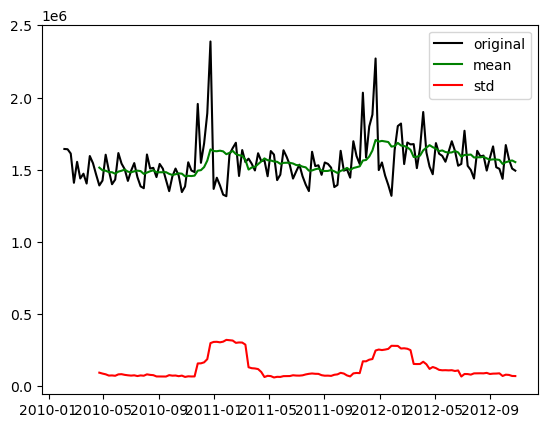

In [23]:
plt.plot(df_store1,color='black',label='original')
plt.plot(mean1,color='green',label='mean')
plt.plot(sd1,color='red',label="std")
plt.legend(loc='best')
plt.show()

In [24]:
!pip install pmdarima

In [25]:
from pmdarima import auto_arima

In [26]:
order=auto_arima(df_store1["Weekly_Sales"])

In [27]:
order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1897.843
Date:                Mon, 21 Aug 2023   AIC                           3807.686
Time:                        13:14:25   BIC                           3825.421
Sample:                    02-05-2010   HQIC                          3814.893
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7500      0.127     -5.919      0.000      -0.998      -0.502
ar.L2         -0.3101      0.128     -2.420      0.016      -0.561      -0.059
ma.L1          0.2867      0.118      2.427      0.015       0.055       0.518
ma.L2         -0.3357      0.109     -3.090      0.002      -0.549      -0.123
ma.L3         -0.6403      0.067     -9.574      0.000      -0.771      -0.509
sigma2      2.408e+10   4.97e-12   4.85e+21      0.000    2.41e+10    2.41e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                44.55
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.77
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.27e+38. Standard errors may be unstable.
"""

In [28]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

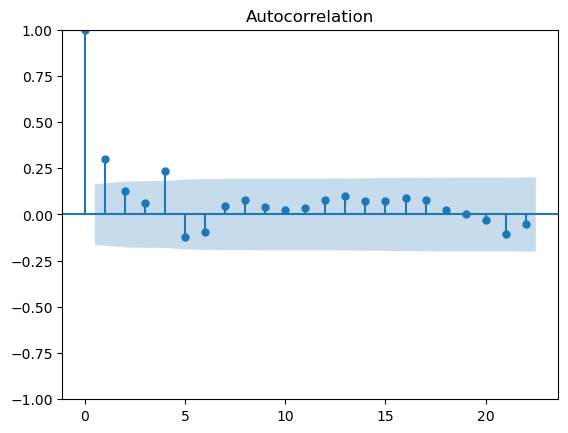

In [29]:
plot_acf(df_store1);

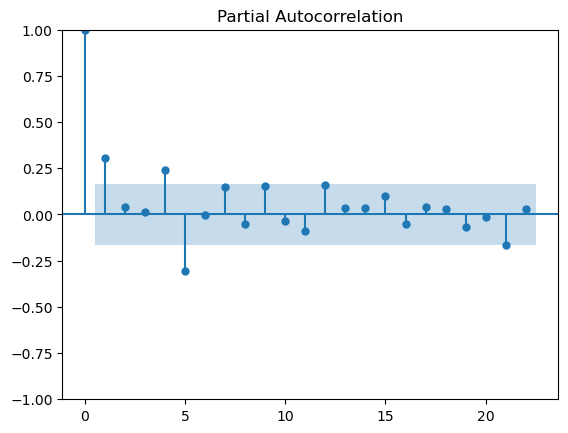

In [30]:
plot_pacf(df_store1);

In [31]:
from statsmodels.tsa.arima.model import ARIMA

In [32]:
train=df_store1.iloc[:120]["Weekly_Sales"]

In [33]:
test=df_store1.iloc[120:]["Weekly_Sales"]

In [34]:
model=ARIMA(train,order=(2,1,3))

C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [35]:
model_fit = model.fit()

In [36]:
df_store1["predict"] = model_fit.predict(start=len(train), end=143)

In [37]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  120
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1598.286
Date:                Mon, 21 Aug 2023   AIC                           3208.573
Time:                        13:15:41   BIC                           3225.248
Sample:                    02-05-2010   HQIC                          3215.344
                         - 05-18-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7433      0.149     -4.980      0.000      -1.036      -0.451
ar.L2         -0.3039      0.148     -2.053      0.040      -0.594      -0.014
ma.L1          0.2912      0.140      2.073      0.0

In [38]:
df_store1["predict"]

Date
2010-02-05             NaN
2010-02-12             NaN
2010-02-19             NaN
2010-02-26             NaN
2010-03-05             NaN
                  ...     
2012-09-28    1.620798e+06
2012-10-05    1.620797e+06
2012-10-12    1.620797e+06
2012-10-19    1.620798e+06
2012-10-26    1.620797e+06
Name: predict, Length: 143, dtype: float64

<AxesSubplot:xlabel='Date'>

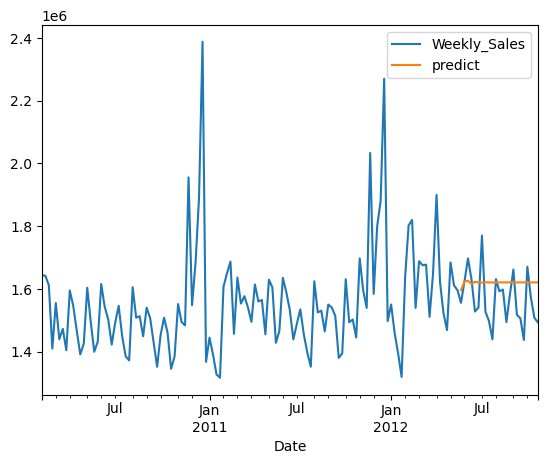

In [39]:
df_store1[["Weekly_Sales", "predict"]].plot()

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [41]:
model=SARIMAX(train,order=(2,1,3),seasonal_order=(2,1,3,48))
model_fit=model.fit()

C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
df_store1["predict"]=model_fit.predict(start=len(train), end=143)

<AxesSubplot:xlabel='Date'>

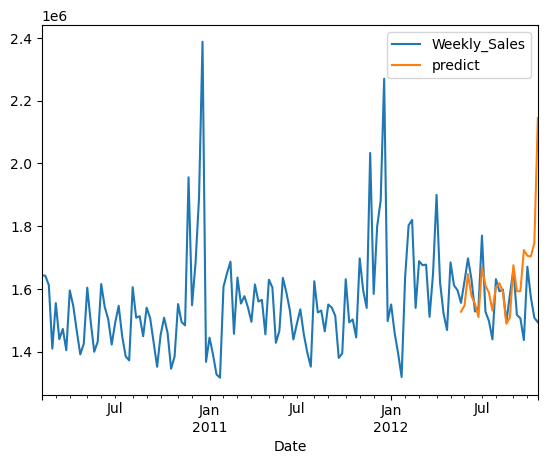

In [43]:
df_store1[["Weekly_Sales", "predict"]].plot()

<AxesSubplot:xlabel='Date'>

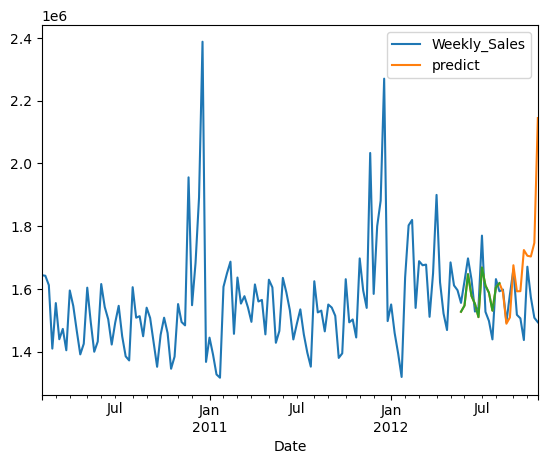

In [44]:
forecast=model_fit.forecast(steps=12)
df_store1.plot()
forecast.plot()

#  Forecasting Weekly Sales for store 27

In [69]:
df_store27=df[(df.Store)==27]
df_store27

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3718,27,2010-02-05,1874289.79,0,27.19,2.954,135.352461,8.237
3719,27,2010-02-12,1745362.72,1,29.81,2.940,135.411308,8.237
3720,27,2010-02-19,1945070.33,0,32.44,2.909,135.465778,8.237
3721,27,2010-02-26,1390934.27,0,36.00,2.910,135.519519,8.237
3722,27,2010-03-05,1313729.72,0,38.07,2.919,135.573260,8.237
...,...,...,...,...,...,...,...,...
3856,27,2012-09-28,1540687.63,0,64.92,4.158,142.765750,8.239
3857,27,2012-10-05,1591816.88,0,64.50,4.151,142.851683,8.000
3858,27,2012-10-12,1660081.29,0,55.40,4.186,142.937617,8.000
3859,27,2012-10-19,1620374.24,0,56.53,4.153,142.863363,8.000


In [70]:
df_store27=df_store27[["Date", "Weekly_Sales"]]


In [71]:
df_store27.index=df_store27["Date"]


In [72]:
del df_store27["Date"]
df_store27

,Weekly_Sales
Date,
2010-02-05,1874289.79
2010-02-12,1745362.72
2010-02-19,1945070.33
2010-02-26,1390934.27
2010-03-05,1313729.72
...,...
2012-09-28,1540687.63
2012-10-05,1591816.88
2012-10-12,1660081.29


In [73]:
from statsmodels.tsa.stattools import adfuller
result27=adfuller(df_store27["Weekly_Sales"])
pval27=result27[1]

In [74]:
pval27

4.361496114578711e-05

In [75]:
# pval27 is less than 0.05 ---> Data is stationary

<AxesSubplot:xlabel='Date'>

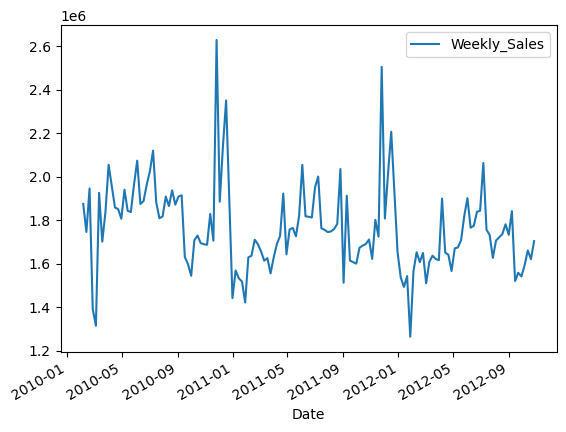

In [76]:
df_store27.plot()

In [77]:
mean27=df_store27.rolling(window=4).mean()
std27=df_store27.rolling(window=4).std()

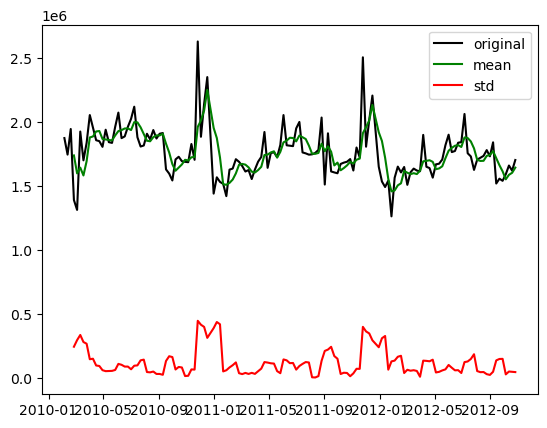

In [78]:
plt.plot(df_store27, color="black", label="original")
plt.plot(mean27, color="green", label="mean")
plt.plot(std27, color="red", label="std")
plt.legend(loc="best")
plt.show()

In [81]:
order27=auto_arima(df_store27["Weekly_Sales"])
order27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  141
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1899.114
Date:                Mon, 21 Aug 2023   AIC                           3810.228
Time:                        13:31:50   BIC                           3827.921
Sample:                             0   HQIC                          3817.418
                                - 141                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.886e+05   1.49e+05      5.950      0.000    5.96e+05    1.18e+06
ar.L1          0.9686      0.163      5.941      0.000       0.649       1.288
ar.L2         -0.4736      0.165     -2.873      0.004      -0.797      -0.151
ma.L1         -0.7412      0.144     -5.130      0.000      -1.024      -0.458
ma.L2          0.6957      0.101      6.918      0.000       0.499       0.893
sigma2      2.909e+10      3.067   9.49e+09      0.000    2.91e+10    2.91e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               253.09
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.11e+26. Standard errors may be unstable.
"""

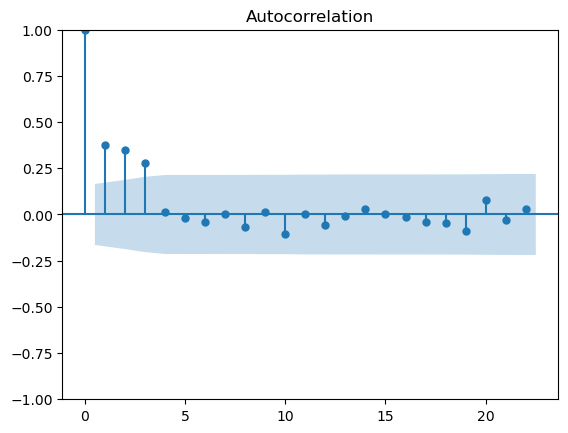

In [82]:
plot_acf(df_store27);

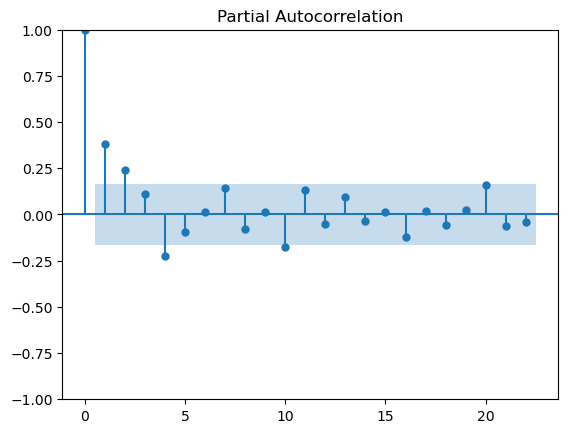

In [83]:
plot_pacf(df_store27);

In [85]:
train27=df_store27.iloc[:120]["Weekly_Sales"]

In [86]:
test27=df_store27.iloc[120:]["Weekly_Sales"]

In [87]:
model27=ARIMA(train27, order=(2,0,2))

C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [88]:
model_fit27=model27.fit()

In [89]:
df_store27["predict"]=model_fit27.predict(start=len(train27), end=142)

C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

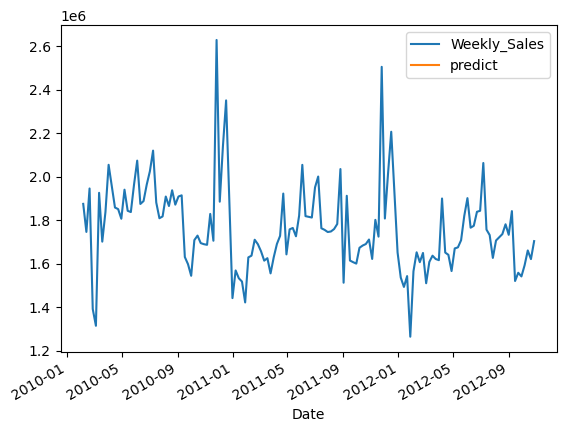

In [90]:
df_store27[["Weekly_Sales", "predict"]].plot()

In [91]:
model27=SARIMAX(train,order=(2,0,2), seasonal_order=(2,0,2,48))
model27_fit=model27.fit()

C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [92]:
df_store27["predict"]=model27_fit.predict(start=len(train27), end=142)

In [93]:
model27_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  120
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 48)   Log Likelihood               -1611.857
Date:                            Mon, 21 Aug 2023   AIC                           3241.714
Time:                                    13:33:49   BIC                           3266.801
Sample:                                02-05-2010   HQIC                          3251.902
                                     - 05-18-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0054      0.749      0.007      0.994      -1.463       1.474
ar.L2          0.9942      0.827      1.203      0.229      -0.626       2.615
ma.L1          0.0920      0.653      0.141      0.888      -1.189       1.373
ma.L2         -0.8894      0.768     -1.159      0.247      -2.394       0.615
ar.S.L48       0.1019    326.951      0.000      1.000    -640.710     640.913
ar.S.L96       0.3087     52.243      0.006      0.995    -102.087     102.704
ma.S.L48       0.0329    354.998   9.28e-05      1.000    -695.750     695.815
ma.S.L96      -0.0424     70.634     -0.001      1.000    -138.482     138.397
sigma2      2.877e+10   5.27e-06   5.46e+15      0.000    2.88e+10    2.88e+10
===================================================================================
Ljung-Box (L1) (Q):                   8.80   Jarque-Bera (JB):               272.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.34   Skew:                             1.84
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.92e+32. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Date'>

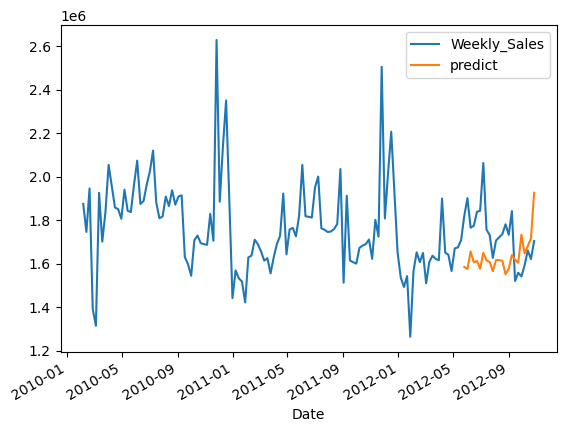

In [94]:
df_store27[["Weekly_Sales", "predict"]].plot()

C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

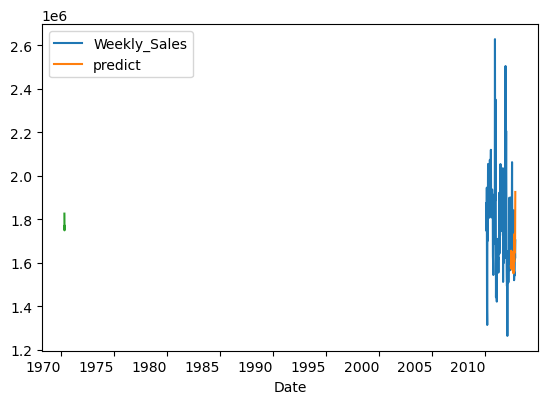

In [342]:
forecast27=model_fit27.forecast(steps=12)
df_store27.plot()
forecast27.plot()

# Forecasting for store 40 

In [139]:
df_store40=df[(df.Store)==40]

In [140]:
df_store40

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5577,40,2010-02-05,1001943.80,0,14.48,2.788,131.527903,5.892
5578,40,2010-02-12,955338.29,1,20.84,2.771,131.586613,5.892
5579,40,2010-02-19,916289.20,0,27.84,2.747,131.637000,5.892
5580,40,2010-02-26,863917.41,0,33.32,2.753,131.686000,5.892
5581,40,2010-03-05,990152.28,0,34.78,2.766,131.735000,5.892
...,...,...,...,...,...,...,...,...
5672,40,2011-12-02,1059676.62,0,38.51,3.501,136.490933,4.420
5673,40,2011-12-09,1158708.98,0,34.48,3.470,136.503067,4.420
5674,40,2011-12-16,1198670.19,0,29.53,3.445,136.533516,4.420
5675,40,2011-12-23,1601585.70,0,24.46,3.413,136.588387,4.420


In [141]:
df_store40=df_store40[["Date", "Weekly_Sales"]]

In [142]:
df_store40.index=df_store40["Date"]

In [143]:
del df_store40["Date"]

In [144]:
df_store40

,Weekly_Sales
Date,
2010-02-05,1001943.80
2010-02-12,955338.29
2010-02-19,916289.20
2010-02-26,863917.41
2010-03-05,990152.28
...,...
2011-12-02,1059676.62
2011-12-09,1158708.98
2011-12-16,1198670.19


In [145]:
result40=adfuller(df_store40["Weekly_Sales"])
pval40=result40[1]
pval40

0.0059523928691442895

<AxesSubplot:xlabel='Date'>

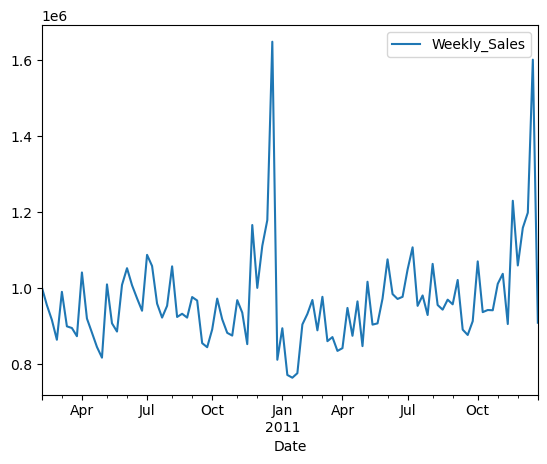

In [146]:
df_store40.plot()

In [111]:
# pval40 is less than 0.05 ----> which is stationary

In [147]:
mean40=df_store40.rolling(window=12).mean()
std40=df_store40.rolling(window=12).std()

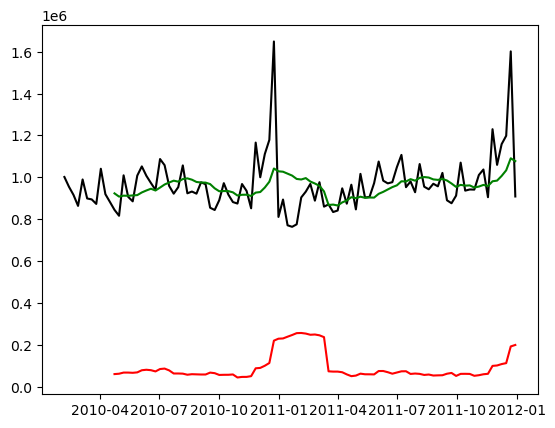

In [148]:
plt.plot(df_store40, color="black", label="original")
plt.plot(mean40, color="green", label="mean")
plt.plot(std40, color="red", label="std")
plt.show()

In [149]:
order40=auto_arima(df_store40["Weekly_Sales"])
order40.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1313.704
Date:                Mon, 21 Aug 2023   AIC                           2635.408
Time:                        14:06:41   BIC                           2645.828
Sample:                    02-05-2010   HQIC                          2639.625
                         - 12-30-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.422e+05    9.8e+04      5.532      0.000     3.5e+05    7.34e+05
ar.L1          0.2136      0.060      3.565      0.000       0.096       0.331
ar.L2          0.2269      0.098      2.312      0.021       0.035       0.419
sigma2      1.534e+10      0.069   2.22e+11      0.000    1.53e+10    1.53e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               330.76
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               3.56   Skew:                             1.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.25e+28. Standard errors may be unstable.
"""

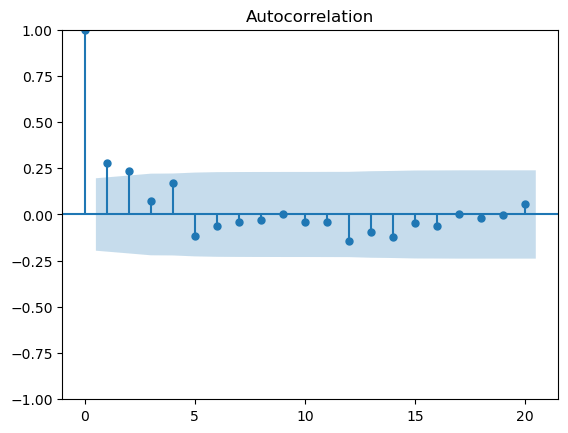

In [150]:
plot_acf(df_store40);

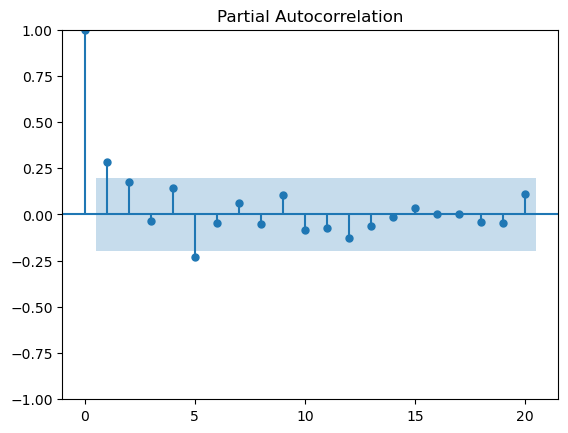

In [151]:
plot_pacf(df_store40);

In [152]:
train40=df_store40.iloc[:80]["Weekly_Sales"]

In [153]:
test40=df_store40.iloc[80:]["Weekly_Sales"]

In [154]:
model40=ARIMA(train40, order=(2,0,0))

C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [155]:
model_fit40=model40.fit()

In [156]:
df_store40["predict"]=model_fit40.predict(start=len(train40), end=len(train40)+len(test40)-1)
df_store40["predict"][:101]

Date
2010-02-05              NaN
2010-02-12              NaN
2010-02-19              NaN
2010-02-26              NaN
2010-03-05              NaN
                  ...      
2011-12-02    951540.386303
2011-12-09    951540.246562
2011-12-16    951540.177552
2011-12-23    951540.143481
2011-12-30    951540.126658
Name: predict, Length: 100, dtype: float64

<AxesSubplot:xlabel='Date'>

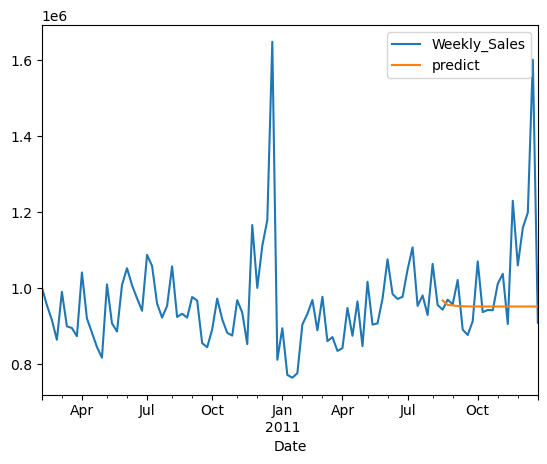

In [157]:
df_store40[["Weekly_Sales", "predict"]].plot()

In [343]:
model40=SARIMAX(train40,order=(2,0,0),seasonal_order=(2,0,0,48))
model_fit40=model.fit()

C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [344]:
df_store40["predict"]=model_fit.predict(start=len(train40), end=101)

<AxesSubplot:xlabel='Date'>

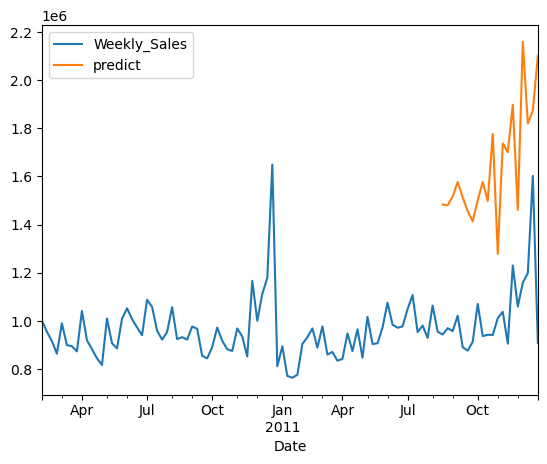

In [160]:
df_store40[["Weekly_Sales", "predict"]].plot()

# Forecasting time series for store 10

In [351]:
df_store10=df[(df.Store)==10]

In [352]:
df_store10=df_store10[["Date", "Weekly_Sales"]]
df_store10.index=df_store10["Date"]


In [353]:
del df_store10["Date"]


<AxesSubplot:xlabel='Date'>

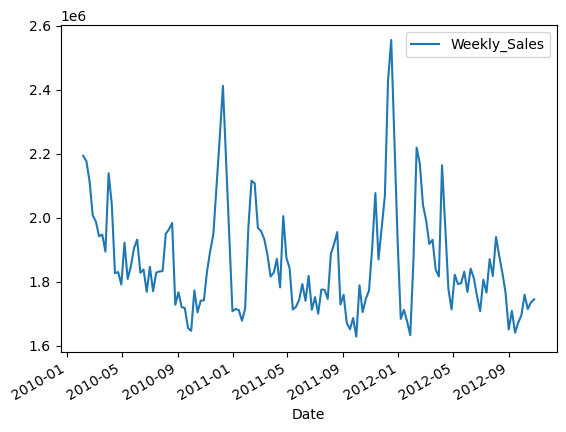

In [354]:
df_store10.plot()

In [355]:
from statsmodels.tsa.stattools import adfuller
result10=adfuller(df_store10['Weekly_Sales'])
pval10 = result10[1]
pval10

0.01601633553591239

In [356]:
# pval10 < 0.05 -----> stationary

In [357]:
mean10=df_store10
mean10=df_store10.rolling(window=12).mean()
std10=df_store10.rolling(window=12).std()

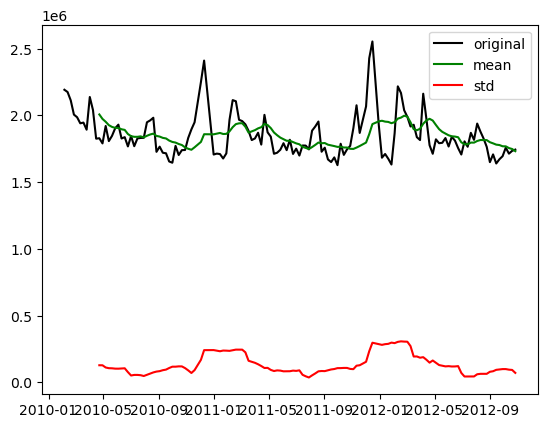

In [358]:
plt.plot(df_store10,color='black',label='original')
plt.plot(mean10,color='green',label='mean')
plt.plot(std10,color='red',label="std")
plt.legend(loc='best')
plt.show()

In [359]:
order10=auto_arima(df_store10['Weekly_Sales'])

In [360]:
order10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  138
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1812.778
Date:                Mon, 21 Aug 2023   AIC                           3633.556
Time:                        16:17:13   BIC                           3645.265
Sample:                             0   HQIC                          3638.314
                                - 138                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.065e+05   9.04e+04      8.920      0.000    6.29e+05    9.84e+05
ar.L1          0.7721      0.070     11.055      0.000       0.635       0.909
ar.L2         -0.2070      0.084     -2.454      0.014      -0.372      -0.042
sigma2      1.462e+10      4.350   3.36e+09      0.000    1.46e+10    1.46e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                48.53
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.36
Prob(H) (two-sided):                  0.94   Kurtosis:                         5.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.74e+24. Standard errors may be unstable.
"""

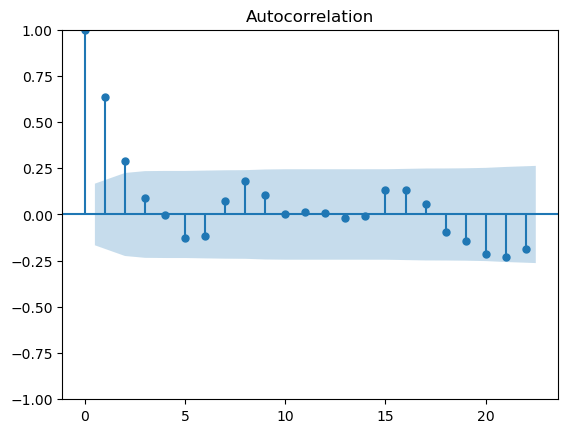

In [361]:
plot_acf(df_store10);

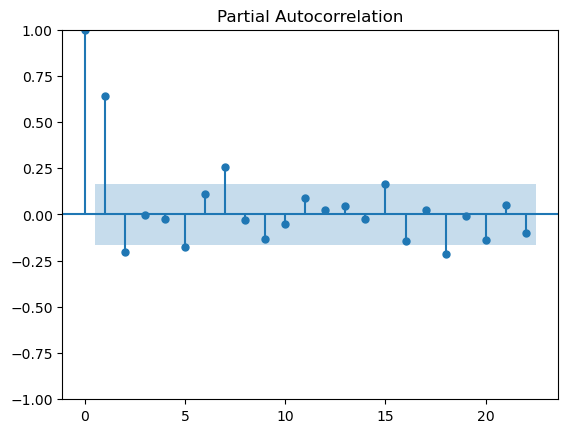

In [362]:
plot_pacf(df_store10);

In [363]:
train10 = df_store10.iloc[:110]['Weekly_Sales']

In [364]:
test10=df_store10.iloc[110:]["Weekly_Sales"]

In [365]:
# build model
model10=ARIMA(train10,order=(2,0,0))

C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [366]:
# fit the data
model_fit10=model10.fit()

In [378]:
# predict
df_store10['predict']=model_fit10.predict(start=110,end=131)

C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

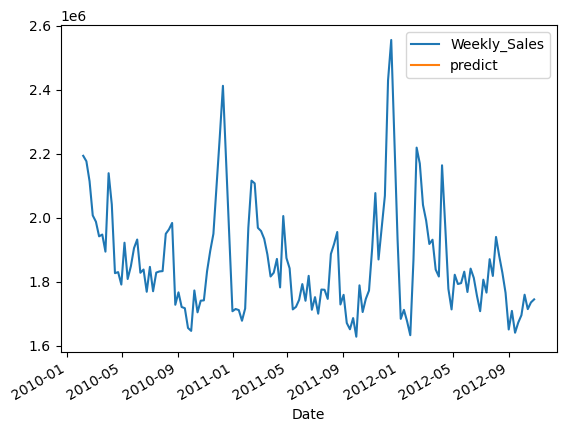

In [379]:
df_store10[['Weekly_Sales','predict']].plot()

In [380]:
model10=SARIMAX(train,order=(2,0,0),seasonal_order=(2,0,0,24))
model1_fit10=model10.fit()

C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [381]:
df_store10['pred']=model_fit10.predict(start=len(train),
                                                  end=len(train)+len(test)-1)

C:\Users\Prasanth M\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

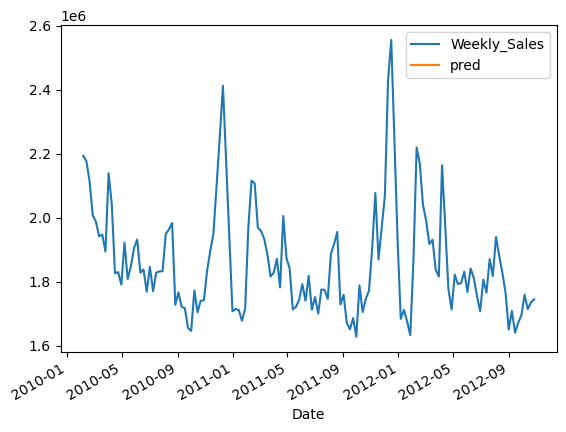

In [382]:
df_store10[['Weekly_Sales','pred']].plot()

In [5]:
# trying to forecast next 60 months with sarimax
forecast10=model_fit10.forecast(steps=60)
df_store10.plot()
forecast.plot() 

NameError: name 'model_fit10' is not defined